<a href="https://colab.research.google.com/github/cooeoeooc/2178_g38/blob/main/group38_code_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
np.random.seed(123)

# Data Preprocessing and Cleaning

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/cooeoeooc/2178_g38/main/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
data.head(5)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
def test_na_num(df):
    for column in df:
        print(sum(df[column].isna()), column)

In [ ]:
test_na_num(data)

0 Arrest_Year
0 Arrest_Month
0 EventID
469 ArrestID
0 PersonID
4 Perceived_Race
0 Sex
24 Age_group__at_arrest_
0 Youth_at_arrest__under_18_years
0 ArrestLocDiv
0 StripSearch
0 Booked
165 Occurrence_Category
0 Actions_at_arrest___Concealed_i
0 Actions_at_arrest___Combative__
0 Actions_at_arrest___Resisted__d
0 Actions_at_arrest___Mental_inst
0 Actions_at_arrest___Assaulted_o
0 Actions_at_arrest___Cooperative
57475 SearchReason_CauseInjury
57475 SearchReason_AssistEscape
57475 SearchReason_PossessWeapons
57475 SearchReason_PossessEvidence
57475 ItemsFound
0 ObjectId


In [ ]:
data=data.dropna(subset=['ArrestID','Age_group__at_arrest_','Perceived_Race','Occurrence_Category'])
data=data.fillna(0)

In [ ]:
test_na_num(data)

0 Arrest_Year
0 Arrest_Month
0 EventID
0 ArrestID
0 PersonID
0 Perceived_Race
0 Sex
0 Age_group__at_arrest_
0 Youth_at_arrest__under_18_years
0 ArrestLocDiv
0 StripSearch
0 Booked
0 Occurrence_Category
0 Actions_at_arrest___Concealed_i
0 Actions_at_arrest___Combative__
0 Actions_at_arrest___Resisted__d
0 Actions_at_arrest___Mental_inst
0 Actions_at_arrest___Assaulted_o
0 Actions_at_arrest___Cooperative
0 SearchReason_CauseInjury
0 SearchReason_AssistEscape
0 SearchReason_PossessWeapons
0 SearchReason_PossessEvidence
0 ItemsFound
0 ObjectId


In [ ]:
# exchange 0 and 1, 0 means cooperative, 1 means otherwise.
data['Actions_at_arrest___Cooperative'] = data['Actions_at_arrest___Cooperative'].replace({0: 1, 1: 0})

Cleaning existing variables. 

Establishing exclusion criteria – based on popular Occurrence Categories. 

In [ ]:
data["Occurrence_Category"].value_counts() # seeing most popular categories
#no need to further investigate this variable
occurrence_replacement_dict={'Assault & Other crimes against persons':0,
                  'Assault':0,
                 'Robbery & Theft':1,
                 'Robbery/Theft':1,
                 'Warrant':2,
                 'FTA/FTC/Compliance Check/Parollee':3,
                 'FTA/FTC, Compliance Check & Parollee':3,
                 'Police Category - Administrative':4,
                 'Drug Related':5}

data["Occurrence_Category"] = data["Occurrence_Category"].replace(occurrence_replacement_dict)
data["Occurrence_Category"] = data["Occurrence_Category"].where(data["Occurrence_Category"].isin(list(occurrence_replacement_dict.values())) == True, 6)

Creating new variables. 

In [ ]:
data["Age_group_clean"] = data["Age_group__at_arrest_"].replace({"Aged 17 years and younger": "Aged 17 years and under", "Aged 65 and older": "Aged 65 years and older"})

In [ ]:
# rearrange searchreasons, the attributes contains 5 values, 0 means no search reason, 1 means one search reason, etc.
data["SearchReasonCount"] = data["SearchReason_CauseInjury"] + data["SearchReason_AssistEscape"] + data["SearchReason_PossessWeapons"] + data["SearchReason_PossessEvidence"]
data["SearchReasonCount"] = np.where(data["SearchReasonCount"].isna() == True, 0, data["SearchReasonCount"])

In [ ]:
data["UncooperativeActionsCount"] = data["Actions_at_arrest___Concealed_i"] + data["Actions_at_arrest___Combative__"] + data["Actions_at_arrest___Resisted__d"] + data["Actions_at_arrest___Mental_inst"] + data["Actions_at_arrest___Assaulted_o"]

In [ ]:
data["Time_series"] = np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "Jan-Mar"), 1, 
                               (np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "Apr-June"), 2, 
                                         (np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "July-Sept"), 3, 
                                                   (np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "Oct-Dec"), 4, 
                                                             (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "Jan-Mar"), 5, 
                                                                       (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "Apr-June"), 6, 
                                                                                 (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "July-Sept"), 7, 
                                                                                           (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "Oct-Dec"), 8, 0)))))))))))))))

In [ ]:
data.columns

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId',
       'Age_group_clean', 'SearchReasonCount', 'UncooperativeActionsCount',
       'Time_series'],
      dtype='object')

In [ ]:
#create new varibles
data['SearchReason'] = np.where(data['SearchReasonCount'] != 0, 1, 0)
data['UncooperativeAction'] = np.where(data['UncooperativeActionsCount'] != 0, 1, 0)

In [ ]:
grouped_data1 = data.groupby(['Time_series','UncooperativeAction'])['StripSearch'].apply(lambda x: (x == 1).sum()).reset_index()
grouped_data1 = grouped_data1.rename(columns={'StripSearch': 'StripSearch_count'})
grouped_data1

,Time_series,UncooperativeAction,StripSearch_count
0,1,0,2085
1,1,1,438
2,2,0,1341
3,2,1,332
4,3,0,1693
5,3,1,439
6,4,0,267
7,4,1,74
8,5,0,205
9,5,1,48


In [ ]:
data.columns

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId',
       'Age_group_clean', 'SearchReasonCount', 'UncooperativeActionsCount',
       'Time_series', 'SearchReason', 'UncooperativeAction'],
      dtype='object')

In [ ]:
grouped_data2 = data.groupby(['Time_series', 'UncooperativeAction', 'SearchReason'])['StripSearch'].apply(lambda x: (x == 1).sum()).reset_index()
grouped_data2 = grouped_data2.rename(columns={'StripSearch': 'StripSearch_count'})

grouped_data2

,Time_series,UncooperativeAction,SearchReason,StripSearch_count
0,1,0,0,139
1,1,0,1,1946
2,1,1,0,22
3,1,1,1,416
4,2,0,0,131
5,2,0,1,1210
6,2,1,0,48
7,2,1,1,284
8,3,0,0,161
9,3,0,1,1532


In [ ]:
grouped_data3 = data.groupby(['Time_series', 'UncooperativeActionsCount','SearchReasonCount'])['StripSearch'].apply(lambda x: (x == 1).sum()).reset_index()
grouped_data3 = grouped_data3.rename(columns={'StripSearch': 'StripSearch_count'})

grouped_data3

,Time_series,UncooperativeActionsCount,SearchReasonCount,StripSearch_count
0,1,0,0.0,139
1,1,0,1.0,609
2,1,0,2.0,584
3,1,0,3.0,417
4,1,0,4.0,336
...,...,...,...,...
134,8,1,3.0,1
135,8,1,4.0,1
136,8,2,0.0,0
137,8,2,1.0,1


In [ ]:
grouped_data4 = data.groupby(['Time_series', 'UncooperativeActionsCount','SearchReasonCount','Age_group_clean'])['StripSearch'].apply(lambda x: (x == 1).sum()).reset_index()
grouped_data4 = grouped_data4.rename(columns={'StripSearch': 'StripSearch_count'})

grouped_data4

,Time_series,UncooperativeActionsCount,SearchReasonCount,Age_group_clean,StripSearch_count
0,1,0,0.0,0,3
1,1,0,0.0,1,29
2,1,0,0.0,2,40
3,1,0,0.0,3,31
4,1,0,0.0,4,31
...,...,...,...,...,...
629,8,3,0.0,1,0
630,8,3,0.0,2,0
631,8,3,0.0,3,0
632,8,3,0.0,4,0


In [ ]:
test_na_num(data)

0 Arrest_Year
0 Arrest_Month
0 EventID
0 ArrestID
0 PersonID
0 Perceived_Race
0 Sex
0 Age_group__at_arrest_
0 Youth_at_arrest__under_18_years
0 ArrestLocDiv
0 StripSearch
0 Booked
0 Occurrence_Category
0 Actions_at_arrest___Concealed_i
0 Actions_at_arrest___Combative__
0 Actions_at_arrest___Resisted__d
0 Actions_at_arrest___Mental_inst
0 Actions_at_arrest___Assaulted_o
0 Actions_at_arrest___Cooperative
0 SearchReason_CauseInjury
0 SearchReason_AssistEscape
0 SearchReason_PossessWeapons
0 SearchReason_PossessEvidence
0 ItemsFound
0 ObjectId
0 Age_group_clean
0 SearchReasonCount
0 UncooperativeActionsCount
0 Time_series
0 SearchReason
0 UncooperativeAction


In [ ]:
data.head(5)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Age_group_clean,SearchReasonCount,UncooperativeActionsCount,Time_series,SearchReason,UncooperativeAction
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0.0,0.0,0.0,1,Aged 35 to 44 years,0.0,0,3,0,0
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0.0,0.0,0.0,2,Aged 35 to 44 years,0.0,0,3,0,0
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0.0,0.0,0.0,3,Aged 35 to 44 years,0.0,0,4,0,0
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0.0,0.0,0.0,4,Aged 25 to 34 years,0.0,0,5,0,0
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0.0,0.0,0.0,5,Aged 25 to 34 years,0.0,0,5,0,0


In [ ]:
data = data.drop(["Age_group__at_arrest_", "ObjectId"], axis = 1)

In [ ]:
import random

age_list=[]

for age_group in data['Age_group_clean']:
  if age_group=='Aged 35 to 44 years':
    age_list.append(round(random.uniform(35, 44), 2))
  elif age_group=='Aged 25 to 34 years':
    age_list.append(round(random.uniform(25, 34), 2))
  elif age_group=='Aged 45 to 54 years':
    age_list.append(round(random.uniform(45, 54), 2))
  elif age_group=='Aged 55 to 64 years':
    age_list.append(round(random.uniform(55, 64), 2))
  elif age_group=='Aged 18 to 24 years':
    age_list.append(round(random.uniform(18, 24), 2))
  elif age_group=='Aged 65 years and older':
    age_list.append(round(random.uniform(65, 80), 2))
  elif age_group=='Aged 17 years and under':
    age_list.append(round(random.uniform(10, 17), 2))

In [ ]:
data['Age']=age_list

In [ ]:
data1=data

In [ ]:
data = data[["Time_series",'Arrest_Year','Arrest_Month', "Perceived_Race", "Sex",'SearchReason', "Youth_at_arrest__under_18_years", "StripSearch", "Occurrence_Category", "ItemsFound","SearchReasonCount",'UncooperativeActionsCount',"Booked",'Age_group_clean','Age','UncooperativeAction']]
data = data.dropna(subset = ["Perceived_Race", "Occurrence_Category"])

In [ ]:
data.columns

Index(['Time_series', 'Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex',
       'SearchReason', 'Youth_at_arrest__under_18_years', 'StripSearch',
       'Occurrence_Category', 'ItemsFound', 'SearchReasonCount',
       'UncooperativeActionsCount', 'Booked', 'Age_group_clean', 'Age',
       'UncooperativeAction'],
      dtype='object')

# EDA

## Visualizations

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
StripSearch_1_data = data[data["StripSearch"] == 1]

In [ ]:
data["Age_group_clean"].value_counts().sort_index(ascending = True)

Aged 17 years and under     3012
Aged 18 to 24 years         9934
Aged 25 to 34 years        20725
Aged 35 to 44 years        16072
Aged 45 to 54 years         9003
Aged 55 to 64 years         4553
Aged 65 years and older     1316
Name: Age_group_clean, dtype: int64

Text(0.5, 1.0, 'Distribution of Perceived Age')

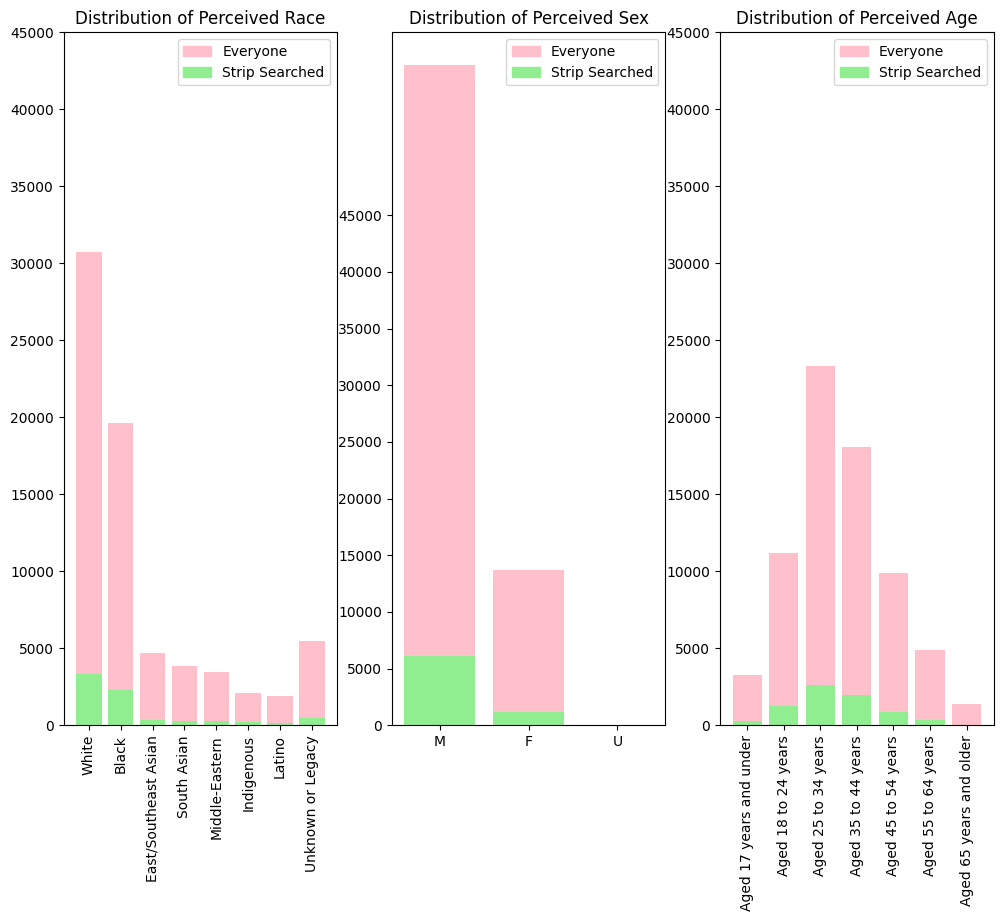

In [ ]:
plt.figure(figsize=(12,9))

colours = {"Everyone": "pink", "Strip Searched": "lightgreen"}
labels = list(colours.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colours[label]) for label in labels]

plt.subplot(1, 3, 1) # strip searches by perceived race
races = data["Perceived_Race"].value_counts().index.tolist()
legacy = races.pop(2)
races.append(legacy)

race_counts = data["Perceived_Race"].value_counts().values.tolist()
legacy = race_counts.pop(2)
race_counts.append(legacy)

stripsearch_race_counts = StripSearch_1_data["Perceived_Race"].value_counts().values.tolist()
legacy = stripsearch_race_counts.pop(2)
stripsearch_race_counts.append(legacy)

plt.bar(races, race_counts, bottom = stripsearch_race_counts, color = "pink")
plt.bar(races, stripsearch_race_counts, color = "lightgreen")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 50000, 5000))
plt.legend(handles, labels)
plt.title("Distribution of Perceived Race")

plt.subplot(1, 3, 2) # strip searches by sex
sexes = data["Sex"].value_counts().index.tolist()
sex_counts = data["Sex"].value_counts().values.tolist()

stripsearch_sex_counts = StripSearch_1_data["Sex"].value_counts().values.tolist()
stripsearch_sex_counts.append(0)

plt.bar(sexes, sex_counts, bottom = stripsearch_sex_counts, color = "pink")
plt.bar(sexes, stripsearch_sex_counts, color = "lightgreen")
plt.yticks(np.arange(0, 50000, 5000))
plt.legend(handles, labels)
plt.title("Distribution of Perceived Sex")

plt.subplot(1, 3, 3) # strip searches by age
ages = data["Age_group_clean"].value_counts().index.tolist()
reordered_1 = ages.pop(ages.index("Aged 17 years and under"))
reordered_2 = ages.pop(ages.index("Aged 18 to 24 years"))
ages.insert(0, reordered_1)
ages.insert(1, reordered_2)

age_counts = data["Age_group_clean"].value_counts().sort_index(ascending = True).values.tolist()

stripsearch_age_counts = StripSearch_1_data["Age_group_clean"].value_counts().sort_index(ascending = True).values.tolist()

plt.bar(ages, age_counts, bottom = stripsearch_age_counts, color = "pink")
plt.bar(ages, stripsearch_age_counts, color = "lightgreen")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 50000, 5000))
plt.legend(handles, labels)
plt.title("Distribution of Perceived Age")

Text(0, 0.5, 'Number of Strip Searches Booked')

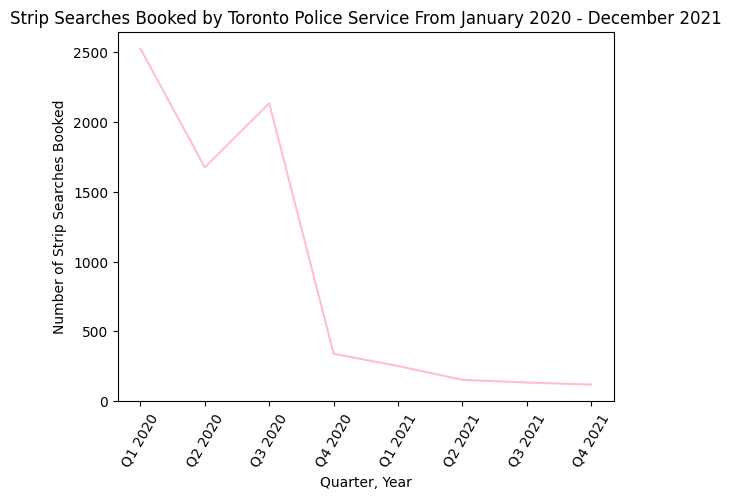

In [ ]:
StripSearch_1_data.groupby(["Time_series"])["StripSearch"].value_counts()
StripSearch_1_data.groupby(["Time_series"])["StripSearch"].value_counts().sort_index(ascending = True).plot(color = "pink")
plt.title("Strip Searches Booked by Toronto Police Service From January 2020 - December 2021")
axes = plt.gca()
axes.set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7])
axes.set_xticklabels(["Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020", "Q1 2021", "Q2 2021", "Q3 2021", "Q4 2021"])
plt.xticks(rotation = 60)
plt.xlabel("Quarter, Year")
plt.ylabel("Number of Strip Searches Booked")

Text(0, 0.5, 'Number of Strip Searches Booked')

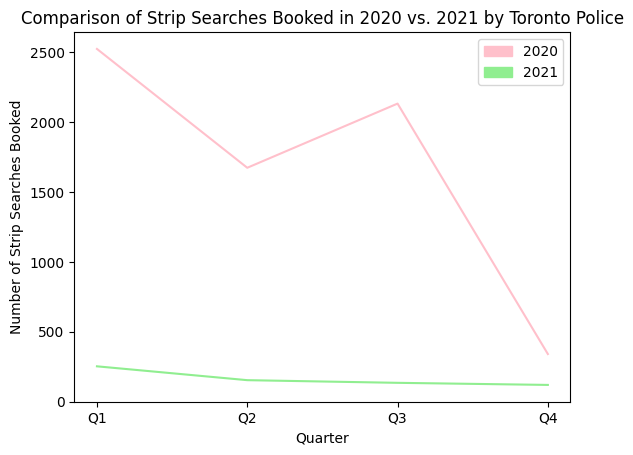

In [ ]:
StripSearch_1_2020_data = data[(data["Arrest_Year"] == 2020) & (data["StripSearch"] == 1)]
StripSearch_1_2021_data = data[(data["Arrest_Year"] == 2021) & (data["StripSearch"] == 1)]

plt1 = StripSearch_1_2020_data.groupby(["Time_series"])["StripSearch"].value_counts().sort_index(ascending = True).plot(color = "pink")
plt2 = StripSearch_1_2021_data.groupby(["Time_series"])["StripSearch"].value_counts().sort_index(ascending = True).plot(color = "lightgreen")
plt_axes = plt.gca()
plt_axes.set_xticks([0, 1, 2, 3])
plt_axes.set_xticklabels(["Q1", "Q2", "Q3", "Q4"])

colours = {"2020": "pink", "2021": "lightgreen"}
labels = list(colours.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colours[label]) for label in labels]
plt.legend(handles, labels)

plt.title("Comparison of Strip Searches Booked in 2020 vs. 2021 by Toronto Police")
plt.xlabel("Quarter")
plt.ylabel("Number of Strip Searches Booked")

In [ ]:
data

,Time_series,Arrest_Year,Arrest_Month,Perceived_Race,Sex,SearchReason,Youth_at_arrest__under_18_years,StripSearch,Occurrence_Category,ItemsFound,SearchReasonCount,UncooperativeActionsCount,Booked,Age_group_clean,Age,UncooperativeAction
0,3,2020,July-Sept,White,M,0,Not a youth,0,0,0.0,0.0,0,1,Aged 35 to 44 years,38.56,0
1,3,2020,July-Sept,White,M,0,Not a youth,0,0,0.0,0.0,0,1,Aged 35 to 44 years,36.32,0
2,4,2020,Oct-Dec,Unknown or Legacy,M,0,Not a youth,0,0,0.0,0.0,0,1,Aged 35 to 44 years,42.12,0
3,5,2021,Jan-Mar,Black,M,0,Not a youth,0,6,0.0,0.0,0,0,Aged 25 to 34 years,25.33,0
4,5,2021,Jan-Mar,South Asian,M,0,Not a youth,0,3,0.0,0.0,0,1,Aged 25 to 34 years,30.77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,8,2021,Oct-Dec,Indigenous,F,0,Not a youth,0,6,0.0,0.0,1,0,Aged 25 to 34 years,30.59,1
65272,8,2021,Oct-Dec,South Asian,M,0,Not a youth,0,0,0.0,0.0,0,1,Aged 35 to 44 years,40.40,0
65273,8,2021,Oct-Dec,White,F,0,Not a youth,0,0,0.0,0.0,0,0,Aged 45 to 54 years,47.68,0
65274,8,2021,Oct-Dec,Unknown or Legacy,M,0,Youth (aged 17 years and under),0,1,0.0,0.0,0,0,Aged 17 years and under,13.99,0


In [ ]:
print(data.columns)

Index(['Time_series', 'Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex',
       'SearchReason', 'Youth_at_arrest__under_18_years', 'StripSearch',
       'Occurrence_Category', 'ItemsFound', 'SearchReasonCount',
       'UncooperativeActionsCount', 'Booked', 'Age_group_clean', 'Age',
       'UncooperativeAction'],
      dtype='object')


In [ ]:
data

,Time_series,Arrest_Year,Arrest_Month,Perceived_Race,Sex,SearchReason,Youth_at_arrest__under_18_years,StripSearch,Occurrence_Category,ItemsFound,SearchReasonCount,UncooperativeActionsCount,Booked,Age_group_clean,Age,UncooperativeAction
0,3,2020,July-Sept,White,M,0,Not a youth,0,0,0.0,0.0,0,1,Aged 35 to 44 years,38.56,0
1,3,2020,July-Sept,White,M,0,Not a youth,0,0,0.0,0.0,0,1,Aged 35 to 44 years,36.32,0
2,4,2020,Oct-Dec,Unknown or Legacy,M,0,Not a youth,0,0,0.0,0.0,0,1,Aged 35 to 44 years,42.12,0
3,5,2021,Jan-Mar,Black,M,0,Not a youth,0,6,0.0,0.0,0,0,Aged 25 to 34 years,25.33,0
4,5,2021,Jan-Mar,South Asian,M,0,Not a youth,0,3,0.0,0.0,0,1,Aged 25 to 34 years,30.77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,8,2021,Oct-Dec,Indigenous,F,0,Not a youth,0,6,0.0,0.0,1,0,Aged 25 to 34 years,30.59,1
65272,8,2021,Oct-Dec,South Asian,M,0,Not a youth,0,0,0.0,0.0,0,1,Aged 35 to 44 years,40.40,0
65273,8,2021,Oct-Dec,White,F,0,Not a youth,0,0,0.0,0.0,0,0,Aged 45 to 54 years,47.68,0
65274,8,2021,Oct-Dec,Unknown or Legacy,M,0,Youth (aged 17 years and under),0,1,0.0,0.0,0,0,Aged 17 years and under,13.99,0


In [ ]:
data['Youth_at_arrest__under_18_years'].unique()

array(['Not a youth', 'Youth (aged 17 and younger)',
       'Youth (aged 17 years and under)'], dtype=object)

In [ ]:
data

,Time_series,Arrest_Year,Arrest_Month,Perceived_Race,Sex,SearchReason,Youth_at_arrest__under_18_years,StripSearch,Occurrence_Category,ItemsFound,SearchReasonCount,UncooperativeActionsCount,Booked,Age_group_clean,Age,UncooperativeAction
0,3,2020,July-Sept,White,M,0,Not a youth,0,0,0.0,0.0,0,1,Aged 35 to 44 years,38.56,0
1,3,2020,July-Sept,White,M,0,Not a youth,0,0,0.0,0.0,0,1,Aged 35 to 44 years,36.32,0
2,4,2020,Oct-Dec,Unknown or Legacy,M,0,Not a youth,0,0,0.0,0.0,0,1,Aged 35 to 44 years,42.12,0
3,5,2021,Jan-Mar,Black,M,0,Not a youth,0,6,0.0,0.0,0,0,Aged 25 to 34 years,25.33,0
4,5,2021,Jan-Mar,South Asian,M,0,Not a youth,0,3,0.0,0.0,0,1,Aged 25 to 34 years,30.77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,8,2021,Oct-Dec,Indigenous,F,0,Not a youth,0,6,0.0,0.0,1,0,Aged 25 to 34 years,30.59,1
65272,8,2021,Oct-Dec,South Asian,M,0,Not a youth,0,0,0.0,0.0,0,1,Aged 35 to 44 years,40.40,0
65273,8,2021,Oct-Dec,White,F,0,Not a youth,0,0,0.0,0.0,0,0,Aged 45 to 54 years,47.68,0
65274,8,2021,Oct-Dec,Unknown or Legacy,M,0,Youth (aged 17 years and under),0,1,0.0,0.0,0,0,Aged 17 years and under,13.99,0


In [ ]:
youth_dict={'Youth (aged 17 and younger)': 0,
            'Youth (aged 17 years and under)': 0, 
            'Not a youth': 1}

data['Youth_at_arrest__under_18_years'] = data['Youth_at_arrest__under_18_years'].replace(youth_dict)

In [ ]:
data = data.dropna()

## t-tests

In [ ]:
data["UncooperativeAction"].unique()

array([0, 1])

In [ ]:
data["SearchReason"].unique()

array([0, 1])

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
#Hypothesis: Cooperate people and non-cooperate people are at the same chance of finding out items, given that they are strip searched.
#H0: Mean cooperated=Mean non-cooperated
#Ha: Mean non_cooperated!=Mean non-cooperated

group1 = data[(data["UncooperativeAction"] == 0)&(data['StripSearch']==1)]
group2 = data[(data["UncooperativeAction"] == 1)&(data['StripSearch']==1)] 

# Welch's t-test: for samples of unequal variance
ttest_ind(group1['ItemsFound'], group2["ItemsFound"], equal_var=False)

# result is not significant -> chance is the same. 

Ttest_indResult(statistic=-1.4257652465976167, pvalue=0.15408426249514764)

In [ ]:
#Hypothesis: Strip search with search reason or without search reason at the same chance of finding out items, given that there is a strip search.
#H0: Mean searchreason=Mean no searchreason
#Ha: Mean searchreason!=Mean no searchreason

group1 = data[(data["SearchReason"] == 0)&(data['StripSearch']==1)]
group2 = data[(data["SearchReason"] == 1)&(data['StripSearch']==1)] 

# Welch's t-test: for samples of unequal variance
ttest_ind(group1['ItemsFound'], group2["ItemsFound"], equal_var=False)

# result is not significant at alpha=0.05 -> chance is the same. 
# However, if alpha=0.1, result is significant.

Ttest_indResult(statistic=1.9160666625700338, pvalue=0.05567815781650137)

In [ ]:
#Hypothesis: Youths and adults are at the same chance of finding out items, given that they are strip searched.
#H0: Mean Youths=Mean adults
#Ha: Mean Youths!=Mean adults
group1 = data[(data["Youth_at_arrest__under_18_years"] == 0)&(data['StripSearch']==1)]
group2 = data[(data["Youth_at_arrest__under_18_years"] == 1)&(data['StripSearch']==1)]
# Welch's t-test: for samples of unequal variance
ttest_ind(group1['ItemsFound'], group2["ItemsFound"], equal_var=False)
# result is not significant -> chance is the same. 

Ttest_indResult(statistic=0.37211961662854176, pvalue=0.7100860360012966)

# Feature Engineering

## Numerical representation

In [ ]:
race_dict = {"White": 0,
             "Unknown or Legacy": 1,
             "Black":2,
             "South Asian":3,
             "Indigenous":4,
             "Middle-Eastern":5, 
             "Latino": 6,
             "East/Southeast Asian":7}

data['Perceived_Race'] = data['Perceived_Race'].replace(race_dict)

In [ ]:
sex_dict= {'M':0,'F':1,'U':2}

data['Sex'] = data['Sex'].replace(sex_dict)

In [ ]:
age_dict={'Aged 17 years and under': 0,
          'Aged 18 to 24 years': 1,
          'Aged 25 to 34 years': 2,
          'Aged 35 to 44 years': 3,
          'Aged 45 to 54 years': 4,
          'Aged 55 to 64 years': 5,
          'Aged 65 years and older': 6,
          }

data['Age_group_clean'] = data['Age_group_clean'].replace(age_dict)

## One-hot encoding

In [ ]:
data.head()

,Time_series,Arrest_Year,Arrest_Month,Perceived_Race,Sex,SearchReason,Youth_at_arrest__under_18_years,StripSearch,Occurrence_Category,ItemsFound,SearchReasonCount,UncooperativeActionsCount,Booked,Age_group_clean,Age,UncooperativeAction
0,3,2020,July-Sept,0,0,0,1,0,0,0.0,0.0,0,1,3,38.56,0
1,3,2020,July-Sept,0,0,0,1,0,0,0.0,0.0,0,1,3,36.32,0
2,4,2020,Oct-Dec,1,0,0,1,0,0,0.0,0.0,0,1,3,42.12,0
3,5,2021,Jan-Mar,2,0,0,1,0,6,0.0,0.0,0,0,2,25.33,0
4,5,2021,Jan-Mar,3,0,0,1,0,3,0.0,0.0,0,1,2,30.77,0


In [ ]:
data.drop('Arrest_Year',axis=1,inplace=True)

In [ ]:
data

,Time_series,Arrest_Month,Perceived_Race,Sex,SearchReason,Youth_at_arrest__under_18_years,StripSearch,Occurrence_Category,ItemsFound,SearchReasonCount,UncooperativeActionsCount,Booked,Age_group_clean,Age,UncooperativeAction
0,3,July-Sept,0,0,0,1,0,0,0.0,0.0,0,1,3,38.56,0
1,3,July-Sept,0,0,0,1,0,0,0.0,0.0,0,1,3,36.32,0
2,4,Oct-Dec,1,0,0,1,0,0,0.0,0.0,0,1,3,42.12,0
3,5,Jan-Mar,2,0,0,1,0,6,0.0,0.0,0,0,2,25.33,0
4,5,Jan-Mar,3,0,0,1,0,3,0.0,0.0,0,1,2,30.77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,8,Oct-Dec,4,1,0,1,0,6,0.0,0.0,1,0,2,30.59,1
65272,8,Oct-Dec,3,0,0,1,0,0,0.0,0.0,0,1,3,40.40,0
65273,8,Oct-Dec,0,1,0,1,0,0,0.0,0.0,0,0,4,47.68,0
65274,8,Oct-Dec,1,0,0,0,0,1,0.0,0.0,0,0,0,13.99,0


In [ ]:
one_hot_data = pd.get_dummies(data, columns=['Occurrence_Category'],prefix=['Occurrence_Category'])

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [ ]:
one_hot_data1 = pd.get_dummies(data, columns=['Age_group_clean'],prefix=['Age_group_clean'])

In [ ]:
one_hot_data2 = pd.get_dummies(data,columns=['SearchReasonCount'],prefix=['SearchReasonCount'])

In [ ]:
one_hot_data3 = pd.get_dummies(data,columns=['Youth_at_arrest__under_18_years'],prefix=['Youth_at_arrest__under_18_years'])

In [ ]:
one_hot_data4 = pd.get_dummies(data,columns=['UncooperativeActionsCount'],prefix=['UncooperativeActionsCount'])

In [ ]:
one_hot_data5 = pd.get_dummies(data,columns=['Perceived_Race'],prefix=['Perceived_Race'])

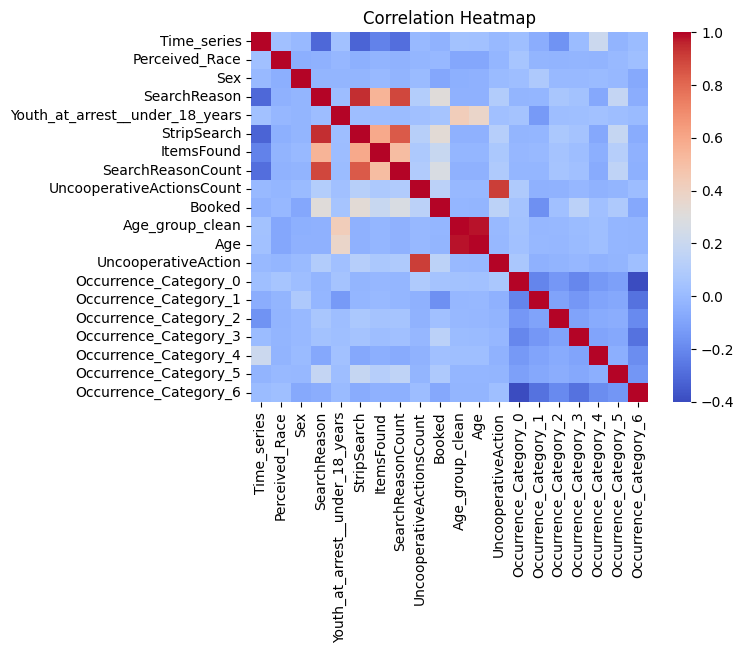

In [ ]:
import seaborn as sns

corr_matrix = one_hot_data.corr()
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', ax=ax, fmt = "0.2f")
ax.set_title('Correlation Heatmap')

plt.show()

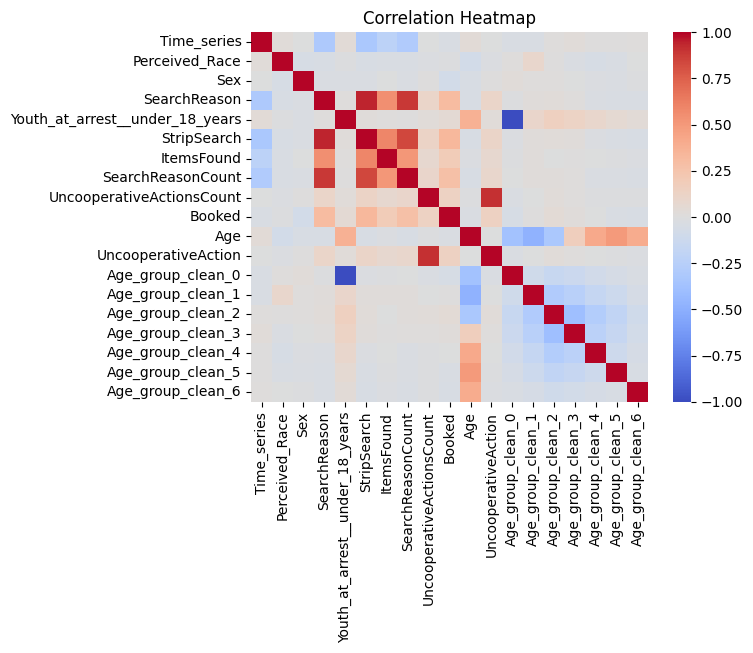

In [ ]:
import seaborn as sns

corr_matrix = one_hot_data1.corr()
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', ax=ax, fmt = "0.2f")
ax.set_title('Correlation Heatmap')

plt.show()

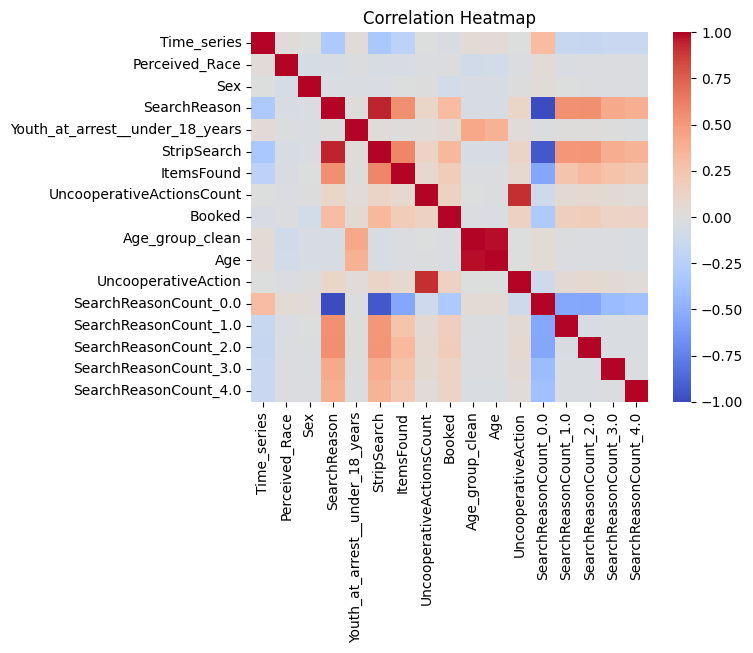

In [ ]:
corr_matrix = one_hot_data2.corr()
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', ax=ax, fmt = "0.2f")
ax.set_title('Correlation Heatmap')

plt.show()

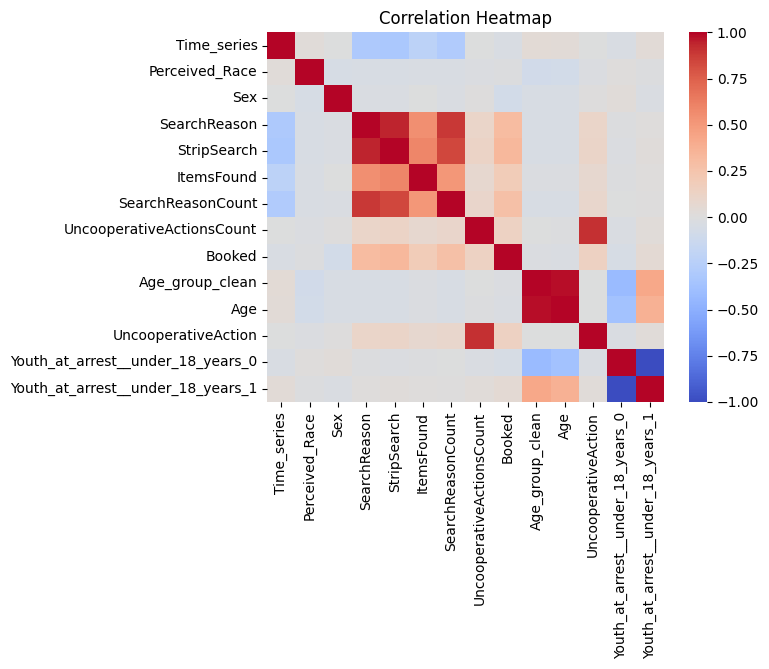

In [ ]:
corr_matrix = one_hot_data3.corr()
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', ax=ax, fmt = "0.2f")
ax.set_title('Correlation Heatmap')

plt.show()

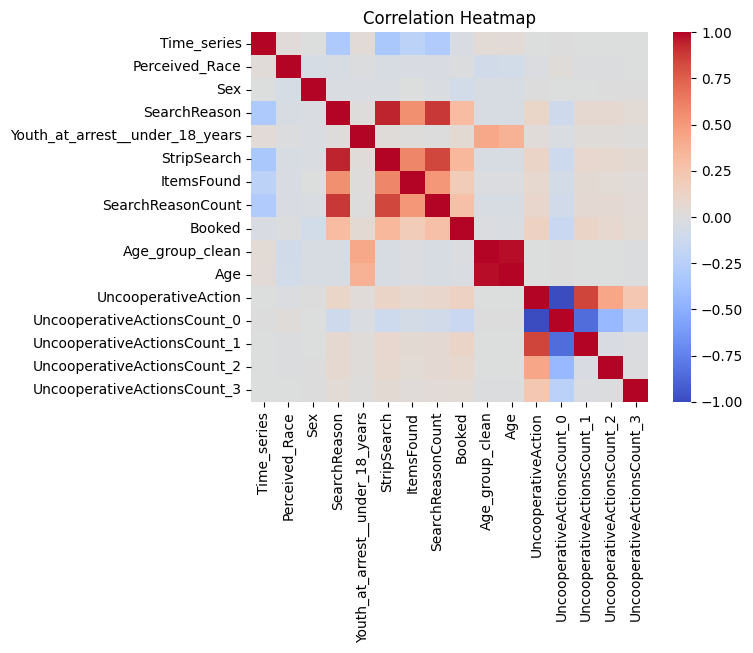

In [ ]:
corr_matrix = one_hot_data4.corr()
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', ax=ax, fmt = "0.2f")
ax.set_title('Correlation Heatmap')

plt.show()

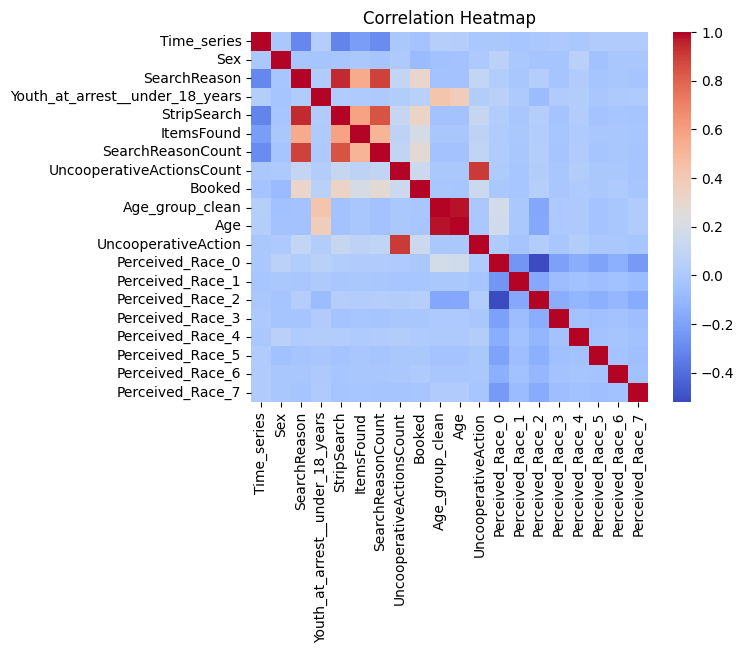

In [ ]:
corr_matrix = one_hot_data5.corr()
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', ax=ax, fmt = "0.2f")
ax.set_title('Correlation Heatmap')
plt.show()

# Power Analysis

Calculating sample sizes needed to observe a statistically significant effect at Cohen's d = {0.2, 0.5, 0.8}. 

In [ ]:
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

power_analysis = smp.TTestIndPower()
sample_size_small_es = power_analysis.solve_power(effect_size=0.2, power=0.8, alpha=0.05)
sample_size_med_es = power_analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.05)
sample_size_large_es = power_analysis.solve_power(effect_size=0.8, power=0.8, alpha=0.05)

sample_sizes = [["For small effect size (d = 0.2)", "For medium effect size (d = 0.5)", "For large effect size (d = 0.8)"], 
                [sample_size_small_es, sample_size_med_es, sample_size_large_es]]

sample_sizes_df = pd.DataFrame(sample_sizes[1:], columns = sample_sizes[0])
sample_sizes_df

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,For small effect size (d = 0.2),For medium effect size (d = 0.5),For large effect size (d = 0.8)
0,393.405693,63.765611,25.524572


# ANCOVA

In [ ]:
grouped_data1

,Time_series,UncooperativeAction,StripSearch_count
0,1,0,2085
1,1,1,438
2,2,0,1341
3,2,1,332
4,3,0,1693
5,3,1,439
6,4,0,267
7,4,1,74
8,5,0,205
9,5,1,48


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('StripSearch_count ~Time_series+UncooperativeAction', data=grouped_data1).fit()

print(model.summary())
#Although this model has high r^2, it does not satisfy power analysis.

                            OLS Regression Results                            
Dep. Variable:      StripSearch_count   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     11.67
Date:                Tue, 11 Apr 2023   Prob (F-statistic):            0.00126
Time:                        02:03:51   Log-Likelihood:                -117.56
No. Observations:                  16   AIC:                             241.1
Df Residuals:                      13   BIC:                             243.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1558.4732    

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
grouped_data2

,Time_series,UncooperativeAction,SearchReason,StripSearch_count
0,1,0,0,139
1,1,0,1,1946
2,1,1,0,22
3,1,1,1,416
4,2,0,0,131
5,2,0,1,1210
6,2,1,0,48
7,2,1,1,284
8,3,0,0,161
9,3,0,1,1532


In [ ]:
model = ols('StripSearch_count ~Time_series+UncooperativeAction+SearchReason', data=grouped_data2).fit()
print(model.summary())
#this model only satisfies effect size when d=0.8.

                            OLS Regression Results                            
Dep. Variable:      StripSearch_count   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     8.570
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           0.000340
Time:                        02:03:52   Log-Likelihood:                -230.50
No. Observations:                  32   AIC:                             469.0
Df Residuals:                      28   BIC:                             474.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             595.5179    

In [ ]:
grouped_data3

,Time_series,UncooperativeActionsCount,SearchReasonCount,StripSearch_count
0,1,0,0.0,139
1,1,0,1.0,609
2,1,0,2.0,584
3,1,0,3.0,417
4,1,0,4.0,336
...,...,...,...,...
134,8,1,3.0,1
135,8,1,4.0,1
136,8,2,0.0,0
137,8,2,1.0,1


In [ ]:
model = ols('StripSearch_count ~Time_series+UncooperativeActionsCount+SearchReasonCount', data=grouped_data3).fit()
print(model.summary())
#make the sample large for effect size consideration.

                            OLS Regression Results                            
Dep. Variable:      StripSearch_count   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     29.38
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           1.10e-14
Time:                        02:05:10   Log-Likelihood:                -819.98
No. Observations:                 139   AIC:                             1648.
Df Residuals:                     135   BIC:                             1660.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
model = ols('StripSearch_count ~Time_series+UncooperativeActionsCount+SearchReasonCount', data=grouped_data4).fit()
print(model.summary())
#make the sample large for effect size consideration.This one satisfied all d value(d=0.2,d=0.5,d=0.8)

                            OLS Regression Results                            
Dep. Variable:      StripSearch_count   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     63.15
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           1.04e-35
Time:                        02:15:45   Log-Likelihood:                -2892.2
No. Observations:                 634   AIC:                             5792.
Df Residuals:                     630   BIC:                             5810.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

# Logistic Regression Model

In [ ]:
grouped_data5 = data.groupby(['Time_series', 'UncooperativeActionsCount','SearchReasonCount','Age_group_clean','Perceived_Race'])['ItemsFound'].apply(lambda x: (x == 1).sum()).reset_index()
grouped_data5 = grouped_data5.rename(columns={'StripSearch': 'StripSearch_count'})

grouped_data5

,Time_series,UncooperativeActionsCount,SearchReasonCount,Age_group_clean,Perceived_Race,ItemsFound
0,1,0,0.0,0,0,0
1,1,0,0.0,0,1,0
2,1,0,0.0,0,2,0
3,1,0,0.0,0,3,0
4,1,0,0.0,0,4,0
...,...,...,...,...,...,...
2428,8,3,0.0,3,7,0
2429,8,3,0.0,4,0,0
2430,8,3,0.0,4,1,0
2431,8,3,0.0,4,2,0


In [169]:
lgdata = grouped_data5.drop(['Time_series','Age_group_clean','Perceived_Race'], axis=1)

In [184]:
lgdata

,UncooperativeActionsCount,SearchReasonCount,ItemsFound
0,0,0.0,0
1,0,0.0,0
2,0,0.0,0
3,0,0.0,0
4,0,0.0,0
...,...,...,...
2428,3,0.0,0
2429,3,0.0,0
2430,3,0.0,0
2431,3,0.0,0


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np

df = lgdata

# Split dataset
X = df[['UncooperativeActionsCount', 'SearchReasonCount']] # i.d
y = df['ItemsFound'] # d.v
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

preprocess_pipeline = Pipeline([
    ('scaler', StandardScaler()),])    
model_pipeline = Pipeline([
    ('preprocess', preprocess_pipeline), # preprocess
    ('model', LogisticRegression()), # lg
])

# Train model
model_pipeline.fit(X_train, y_train)

# Test
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Predict accuracy: {accuracy:.2f}")

# Compute prediction interval using bootstrap
n_bootstraps = 1000
bootstrap_scores = np.empty(n_bootstraps)
for i in range(n_bootstraps):
    indices = np.random.choice(X_test.index, size=len(X_test), replace=True)
    X_boot = X_test.loc[indices]
    y_boot = y_test.loc[indices]
    y_pred_boot = model_pipeline.predict_proba(X_boot)
    bootstrap_scores[i] = accuracy_score(y_boot, (y_pred_boot[:,1] > 0.5).astype(int))
    
alpha = 0.05
lower = np.percentile(bootstrap_scores, 100*alpha/2)
upper = np.percentile(bootstrap_scores, 100*(1-alpha/2))
print(f"Prediction interval: ({lower:.2f}, {upper:.2f})，95% Prediction Interval")




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predict accuracy: 0.64
Prediction interval: (0.60, 0.67)，95% Prediction Interval
